# apartment-hunter

The dataset is a home (in the King County area, Washington State) sales data that comes from the official public records. The data set contains 21613 rows. Each represents a home sold from May 2014 through May 2015.

#### Libraries

In [1]:
from appartment_hunter import *

#### Original data

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df_original = df.copy()

In [3]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.00         3       1.00         1180   
1  6414100192  20141209T000000 538000.00         3       2.25         2570   
2  5631500400  20150225T000000 180000.00         2       1.00          770   
3  2487200875  20141209T000000 604000.00         4       3.00         1960   
4  1954400510  20150218T000000 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00           0     0  ...      7        1180              0   
1      7242    2.00           0     0  ...      7        2170            400   
2     10000    1.00           0     0  ...      6         770              0   
3      5000    1.00           0     0  ...      7        1050            910   
4      8080    1.00           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.51 -122.26           1340        5650  
1      1951          1991    98125 47.72 -122.32           1690        7639  
2      1933             0    98028 47.74 -122.23           2720        8062  
3      1965             0    98136 47.52 -122.39           1360        5000  
4      1987             0    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

#### Data Summary

Data shape:

In [4]:
print(f'The original dataframe has {df.shape[0]} lines and {df.shape[1]} columns.')

The original dataframe has 21613 lines and 21 columns.


All columns:

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Existing data types:

In [6]:
df.dtypes.value_counts()

int64      15
float64     5
object      1
Name: count, dtype: int64

Dataframe columns with value count and data type:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Number of unique values in each column:

In [8]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

#### Initial data cleaning

Initial data cleaning:  
- `date` - change data type to datetime
- `id` - deduplicate
- `price` - change to integer
- `bedrooms` - check if *33* bedrooms is not an outlier or typo error
- `bathrooms` - create column `toilet` with boolean values and change `bathrooms` to integer by rounding the number to integer
- `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement`, `sqft_living15`, `sqft_lot15` change to square meters - `sqm_living`, `sqm_lot`, `sqm_above`, `sqm_basement`, `sqm_living15`, `sqm_lot15`
- `waterfront` - change to boolean
- `yr_renovated` - create new column `renovated` with boolean values and change `yr_renovated` 0 values to Null, column to int  
- `zipcode` - group zipcodes to have larger groups

##### date

We will convert `date` column to a datetime data type for easier manipulation and analysis:

In [9]:
df['date'] = pd.to_datetime(df['date'])
df.describe(include='datetime')

date
count                          21613
mean   2014-10-29 04:38:01.959931648
min              2014-05-02 00:00:00
25%              2014-07-22 00:00:00
50%              2014-10-16 00:00:00
75%              2015-02-17 00:00:00
max              2015-05-27 00:00:00

The Real Estate sales data begins on May 2, 2014, and ends on May 27, 2015.

##### sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15

Square footage of living space ('sqft_living') is always equal to the sum of the square footage of the habitable space above ground ('sqft_above') and the square footage of the habitable space below ground ('sqft_basement').

Searching for rows where sqft_living would not be equal to sum of sqft_above and sqft_basement:

In [10]:
mismatched_rows = df[df['sqft_living'] != df['sqft_above'] + df['sqft_basement']]
mismatched_rows

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

sqft_living is always equal to sum of sqft_above and sqft_basement

Converting **square feet** to **square meters**:

In [11]:
# Converting columns from square feet to meters
for col in ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]:
    df[col] = round(df[col] * 0.092903, 2)

In [12]:
# Renaming sqft columns to sqm (square meters)
new_column_names = {
    "sqft_living": "sqm_living",
    "sqft_lot": "sqm_lot",
    "sqft_above": "sqm_above",
    "sqft_basement": "sqm_basement",
    "sqft_living15": "sqm_living15",
    "sqft_lot15": "sqm_lot15"
}
df.rename(columns=new_column_names, inplace=True)

##### price

The `price` is our target variable. To enhance readability, we will convert the column to **integer**.

Checking if there are any price values where the decimal part is not equal to 0:

In [13]:
prices_with_nonzero_decimal = df[df['price'].astype(str).str.contains(r'\.\d*[1-9]')]
print(prices_with_nonzero_decimal['price'])

Series([], Name: price, dtype: float64)


Converting price to integer:

In [14]:
df['price'] = df['price'].astype(int)

##### bedrooms

All unique `bedroom` values:

In [15]:
sorted(df['bedrooms'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]

Checking if value 33 is not an outlier:

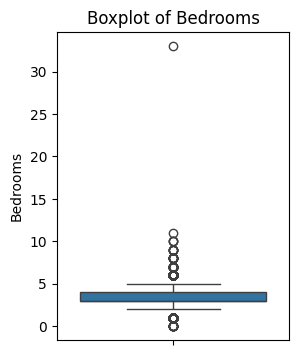

In [16]:
boxplot(df['bedrooms'], 'Bedrooms', figsize=(3, 4))

In [17]:
df_33_bedrooms = df[df['bedrooms'] == 33]
df_33_bedrooms

id       date   price  bedrooms  bathrooms  sqm_living  \
15870  2402100895 2014-06-25  640000        33       1.75      150.50   

       sqm_lot  floors  waterfront  view  ...  grade  sqm_above  sqm_basement  \
15870   557.42    1.00           0     0  ...      7      96.62         53.88   

       yr_built  yr_renovated  zipcode   lat    long  sqm_living15  sqm_lot15  
15870      1947             0    98103 47.69 -122.33        123.56     436.64  

[1 rows x 21 columns]

The sale record for real estate object with id=2402100895 lists 33 bedrooms, which seems like a data entry error given the `sq_m_living` size (150.50 sq m). 3-4 bedrooms for this property size is within the data Interquartile Range (IQR). We will update the number of bedrooms from 33 to 3.

In [18]:
df.loc[df['id'] == 2402100895, 'bedrooms'] = 3

##### waterfront

Changing `waterfront` variable values to boolean:

In [19]:
df["waterfront"] = df["waterfront"].replace({
    1 : True, 
    0 : False
    })

##### yr_renovated

Changing `yr_renovated` 0 values to Null:

In [20]:
df['yr_renovated'] = df['yr_renovated'].replace({
    0 : np.nan
    })

Creating a new column `renovated` with boolean values:

In [21]:
df['renovated'] = df['yr_renovated'].notnull()

Reordering columns:

In [22]:
new_column_order = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqm_above', 'sqm_basement', 'yr_built', 'renovated', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqm_living15', 'sqm_lot15']
df = df.loc[:, new_column_order]

##### zipcode

Calculating unique `zipcode` values:

In [23]:
print('Number of unique zipcodes in the dataframe:', len(df.zipcode.unique()))

Number of unique zipcodes in the dataframe: 70


There are 70 unique zipcode values. To group them to larger groups, we are importing the table of zipcodes in King County, WA, and their Primary Cities:

In [24]:
zipcodes_df = pd.read_csv('data/zipcodes_King_County_WA.csv', delimiter=';')
zipcodes_df.head()

ZIP  % of County Population      Type Primary City
0  98001                    0.02  Standard       Auburn
1  98002                    0.02  Standard       Auburn
2  98092                    0.02  Standard       Auburn
3  98224                    0.00    PO Box       Baring
4  98004                    0.01  Standard     Bellevue

Adding additional column `city` to the `df`:

In [25]:
zip_city_mapping = dict(zip(zipcodes_df['ZIP'], zipcodes_df['Primary City']))
df['city'] = df['zipcode'].map(zip_city_mapping)
print('Unique cities in the dataset:', len(df.city.unique()))

Unique cities in the dataset: 24


Reordering columns:

In [26]:
new_column_order = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqm_above', 'sqm_basement', 'yr_built', 'renovated', 'yr_renovated', 'zipcode', 'city', 'lat', 'long', 'sqm_living15', 'sqm_lot15']
df = df.loc[:, new_column_order]

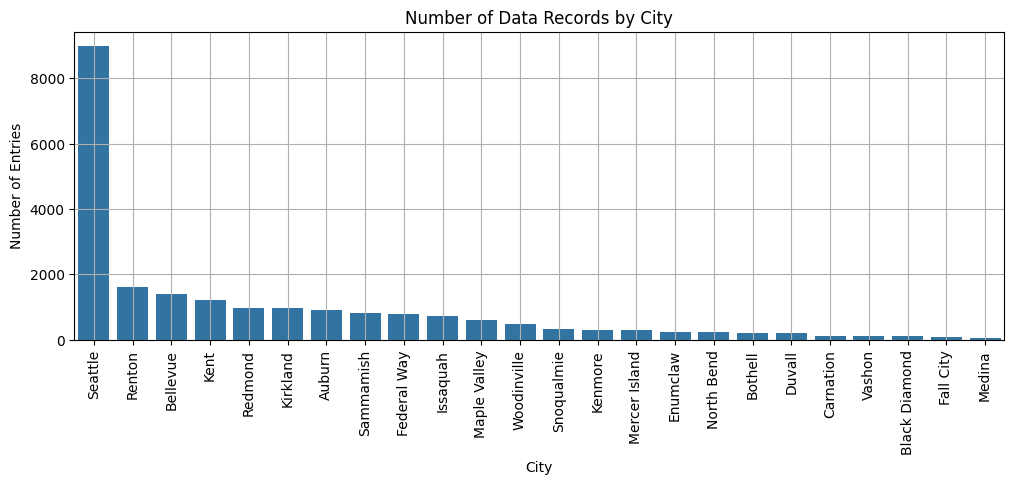

In [27]:
city_counts = df['city'].value_counts()
barplot(city_counts, 'Number of Data Records by City', 'City', 'Number of Entries', figsize=(12, 4), xticksrotation=90)

##### id - Deduplication:

Looking for duplicates by `id` column

In [28]:
duplicates = df[df.duplicated(['id'], keep=False)]
print('Lines with duplicating ids: ', len(duplicates))

Lines with duplicating ids:  353


Testing if all duplicates share the same features. Creating deduplication key in the df with all row elements except for `price` and `date`:

In [29]:
# Creating deduplication_key
columns_to_include = ['id', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqm_above', 'sqm_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqm_living15', 'sqm_lot15']
df['deduplication_key'] = df[columns_to_include].apply(lambda row: '_'.join(map(str, row)), axis=1)
# Finding duplicates by the deduplication_key
duplicates = df[df.duplicated(subset='deduplication_key', keep=False)]
print('Lines with duplicating ids where all features remain the same: ', len(duplicates))

Lines with duplicating ids where all features remain the same:  353


All features remain the same except for price and date. This means the object was sold more than once with all same features but different price.

Creating deduplicated **df_latest** where latest date values are left in the df:

In [30]:
df_latest = df.sort_values(by='date', ascending=True)
df_latest = df_latest.drop_duplicates('id', keep='last')
del df_latest['deduplication_key']
del df['deduplication_key']

One duplicate (id=6021501535) example in original **df**:

In [31]:
example_id = df[df['id'] == 6021501535]
example_id

id       date   price  bedrooms  bathrooms  sqm_living  sqm_lot  \
93  6021501535 2014-07-25  430000         3       1.50      146.79   464.52   
94  6021501535 2014-12-23  700000         3       1.50      146.79   464.52   

    floors  waterfront  view  ...  sqm_basement  yr_built  renovated  \
93    1.00       False     0  ...         26.94      1939      False   
94    1.00       False     0  ...         26.94      1939      False   

    yr_renovated  zipcode     city   lat    long sqm_living15  sqm_lot15  
93           NaN    98117  Seattle 47.69 -122.39       145.86     418.06  
94           NaN    98117  Seattle 47.69 -122.39       145.86     418.06  

[2 rows x 23 columns]

The same duplicate (id=6021501535) example in **df_latest**:

In [32]:
example_id = df_latest[df_latest['id'] == 6021501535]
example_id

id       date   price  bedrooms  bathrooms  sqm_living  sqm_lot  \
94  6021501535 2014-12-23  700000         3       1.50      146.79   464.52   

    floors  waterfront  view  ...  sqm_basement  yr_built  renovated  \
94    1.00       False     0  ...         26.94      1939      False   

    yr_renovated  zipcode     city   lat    long sqm_living15  sqm_lot15  
94           NaN    98117  Seattle 47.69 -122.39       145.86     418.06  

[1 rows x 23 columns]

In [33]:
print('Number of rows in df: ', df.shape[0])
print('Number of rows in df_latest: ', df_latest.shape[0])

Number of rows in df:  21613
Number of rows in df_latest:  21436


After deduplication dataframe should have 21436 remaining rows.

No feature other than the price changes from one sale to the next, and one year period is too short for the real estate value to increase because of capital appreciation. Taking the average price of sales of the same object would skew the price data from slightly platykurtic distribution (kurtosis value (-0.01)) to sligthly leptokurtic (kurtosis value (0.09)) and further from Gaussian distribution (The analysis has been done but not included into this notebook).  
**We have no justification for a price change using the data provided, so we are going to keep the latest sale data.**

In [34]:
df = df_latest.copy()

Since now the dataframe has only unique IDs:

In [35]:
num_unique_ids = df['id'].nunique()
num_of_lines = len(df)
print('Number of lines in all df:', num_of_lines)
print('Number of unique IDs in df:', num_unique_ids)
print('Dataframe contains only unique IDs: ', (num_unique_ids==num_of_lines))

Number of lines in all df: 21436
Number of unique IDs in df: 21436
Dataframe contains only unique IDs:  True


ID column can now be removed:

In [36]:
del df['id']

#### Data after the cleaning

Data shape:

In [37]:
print(f'Dataframe has {df.shape[0]} lines and {df.shape[1]} columns.')

Dataframe has 21436 lines and 22 columns.


All columns:

In [38]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqm_above',
       'sqm_basement', 'yr_built', 'renovated', 'yr_renovated', 'zipcode',
       'city', 'lat', 'long', 'sqm_living15', 'sqm_lot15'],
      dtype='object')

Variables that have been added:  
- `renovated`  
- `city`

One column removed:  
- `id`

Existing data types:

In [39]:
df.dtypes.value_counts()

float64           11
int64              6
bool               2
datetime64[ns]     1
int32              1
object             1
Name: count, dtype: int64

Number of unique values in each column:

In [40]:
df.nunique()

date             372
price           3997
bedrooms          12
bathrooms         30
sqm_living      1038
sqm_lot         9782
floors             6
waterfront         2
view               5
condition          5
grade             12
sqm_above        946
sqm_basement     306
yr_built         116
renovated          2
yr_renovated      69
zipcode           70
city              24
lat             5034
long             752
sqm_living15     777
sqm_lot15       8689
dtype: int64

In [41]:
df.describe(include=['bool', 'object'])

waterfront renovated     city
count       21436     21436    21436
unique          2         2       24
top         False     False  Seattle
freq        21273     20526     8889

In [42]:
df.describe(include='int64')

bedrooms     view  condition    grade  yr_built  zipcode
count  21436.00 21436.00   21436.00 21436.00  21436.00 21436.00
mean       3.37     0.24       3.41     7.66   1971.10 98077.86
std        0.91     0.77       0.65     1.17     29.39    53.47
min        0.00     0.00       1.00     1.00   1900.00 98001.00
25%        3.00     0.00       3.00     7.00   1952.00 98033.00
50%        3.00     0.00       3.00     7.00   1975.00 98065.00
75%        4.00     0.00       4.00     8.00   1997.00 98117.00
max       11.00     4.00       5.00    13.00   2015.00 98199.00

In [43]:
df.describe(include='float64')

bathrooms  sqm_living   sqm_lot   floors  sqm_above  sqm_basement  \
count   21436.00    21436.00  21436.00 21436.00   21436.00      21436.00   
mean        2.12      193.49   1406.15     1.50     166.39         27.10   
std         0.77       85.39   3859.06     0.54      77.02         41.14   
min         0.00       26.94     48.31     1.00      26.94          0.00   
25%         1.75      132.85    468.23     1.00     111.48          0.00   
50%         2.25      178.37    707.36     1.50     144.93          0.00   
75%         2.50      236.90    993.71     2.00     206.24         52.03   
max         8.00     1257.91 153416.21     3.50     874.22        447.79   

       yr_renovated      lat     long  sqm_living15  sqm_lot15  
count        910.00 21436.00 21436.00      21436.00   21436.00  
mean        1995.90    47.56  -122.21        184.72    1187.85  
std           15.50     0.14     0.14         63.70    2543.26  
min         1934.00    47.16  -122.52         37.07      60.48  
25%         1987.00    47.47  -122.33        138.43     473.81  
50%         2000.00    47.57  -122.23        170.94     707.92  
75%         2007.00    47.68  -122.12        220.18     937.13  
max         2015.00    47.78  -121.31        576.93   80937.09

**Quantitative variables**: sqm_living, sqm_above, sqm_basement, sqm_lot, sqm_living15, sqm_lot15, floors, yr_renovated, bedrooms, bathrooms, yr_built  
  
**Categorical variables**: view, condition, grade, zipcode, city, renovated, toilet, waterfront

#### Missing values

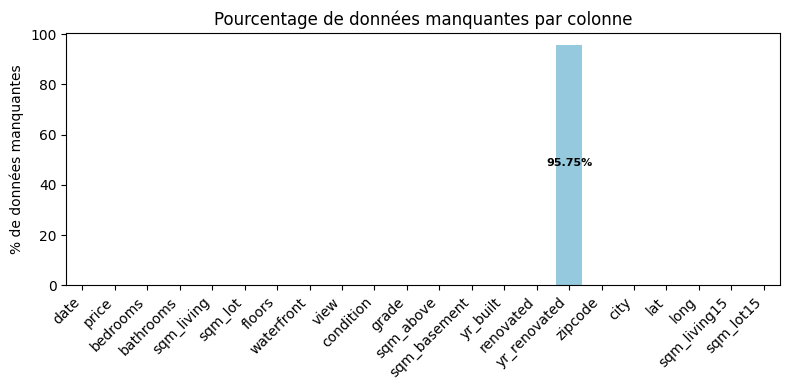

In [44]:
# Calculer le pourcentage de données manquantes par colonne
pourcentage_manquant_par_colonne = df.copy()
pourcentage_manquant_par_colonne = pourcentage_manquant_par_colonne.isnull().sum() / len(df) * 100

# Créer le graphique à barres
plt.figure(figsize=(8, 4))
sns.barplot(pourcentage_manquant_par_colonne, color='skyblue')
plt.title('Pourcentage de données manquantes par colonne')
plt.ylabel("% de données manquantes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Ajouter les valeurs non nulles au-dessus de chaque barre
for i, v in enumerate(pourcentage_manquant_par_colonne.values):
    if v != 0:  # Vérifier si la valeur est non nulle
        plt.text(i, (v / 2) - 1, f"{round(v, 2)}%", ha='center', va='bottom', fontsize=8, fontweight='bold')
plt.show()

#### Univariate analysis

##### Quantitative variables

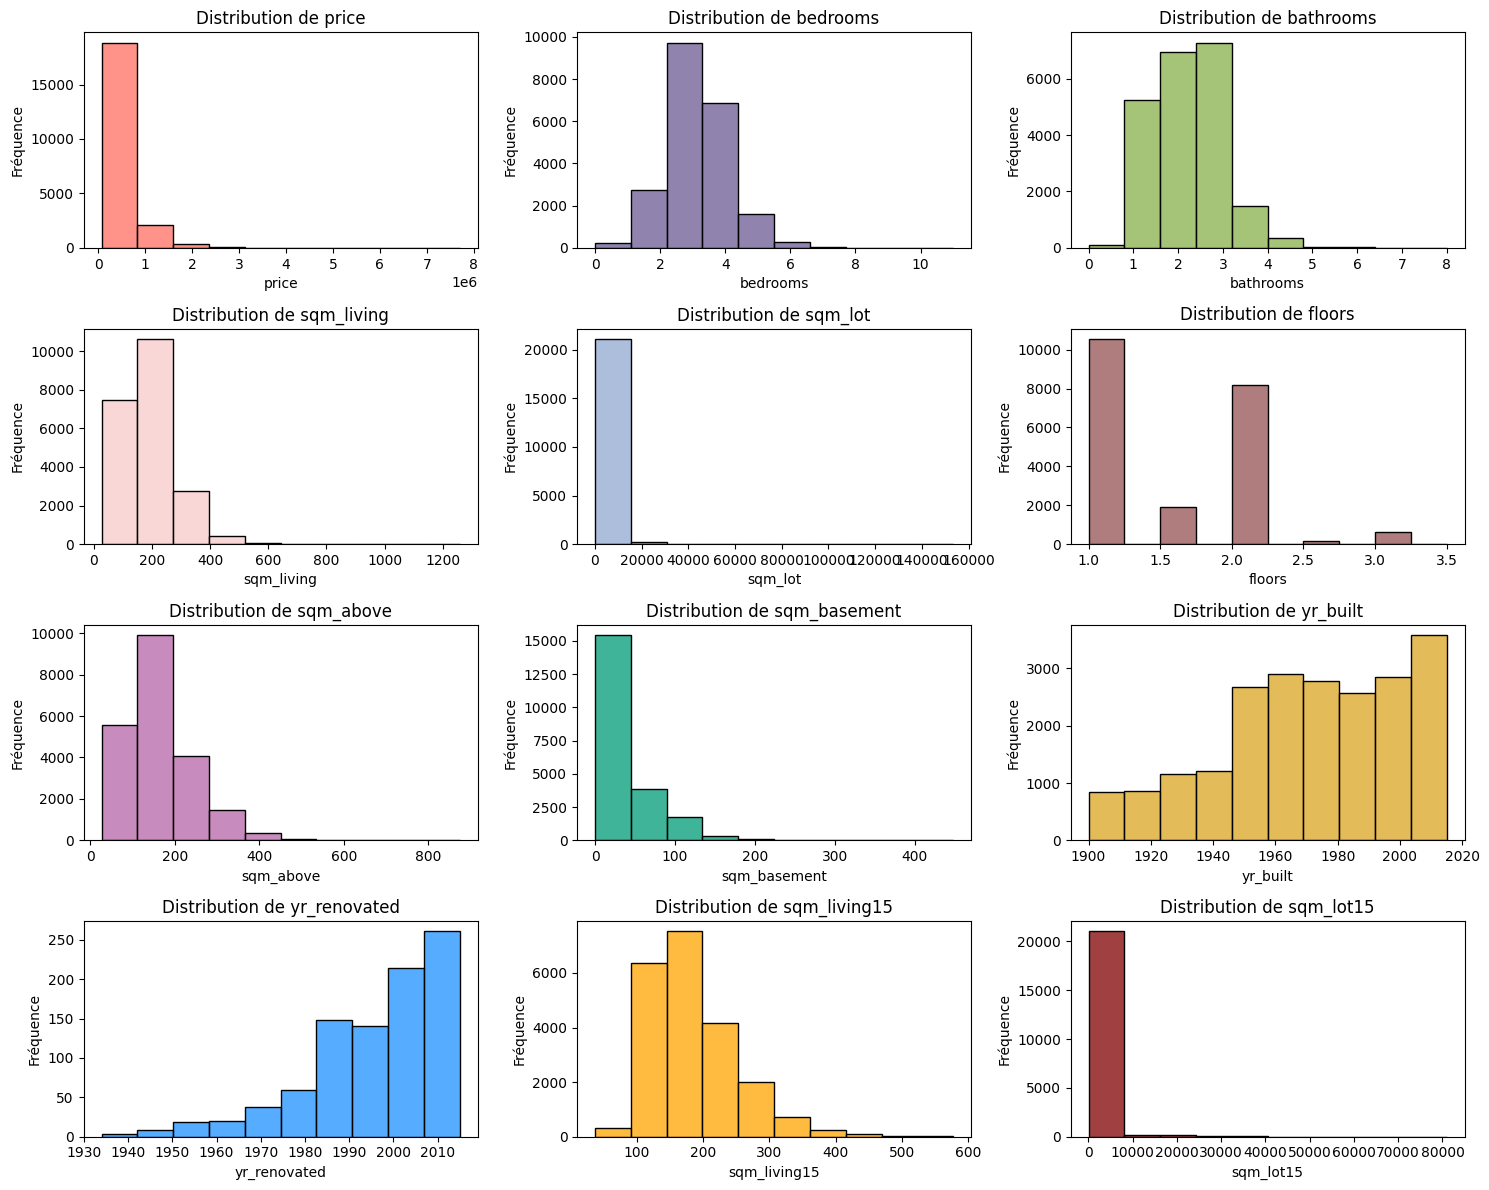

In [45]:
# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors_quantitative)):
    
    # Identifier les sous-graphiques
    row = i // 3  # Calcul de la ligne
    col = i % 3   # Calcul de la colonne

    # Histogramme des données brutes
    sns.histplot(df[variable], bins=10, color=color, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution de {variable}')
    axes[row, col].set_ylabel('Fréquence')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

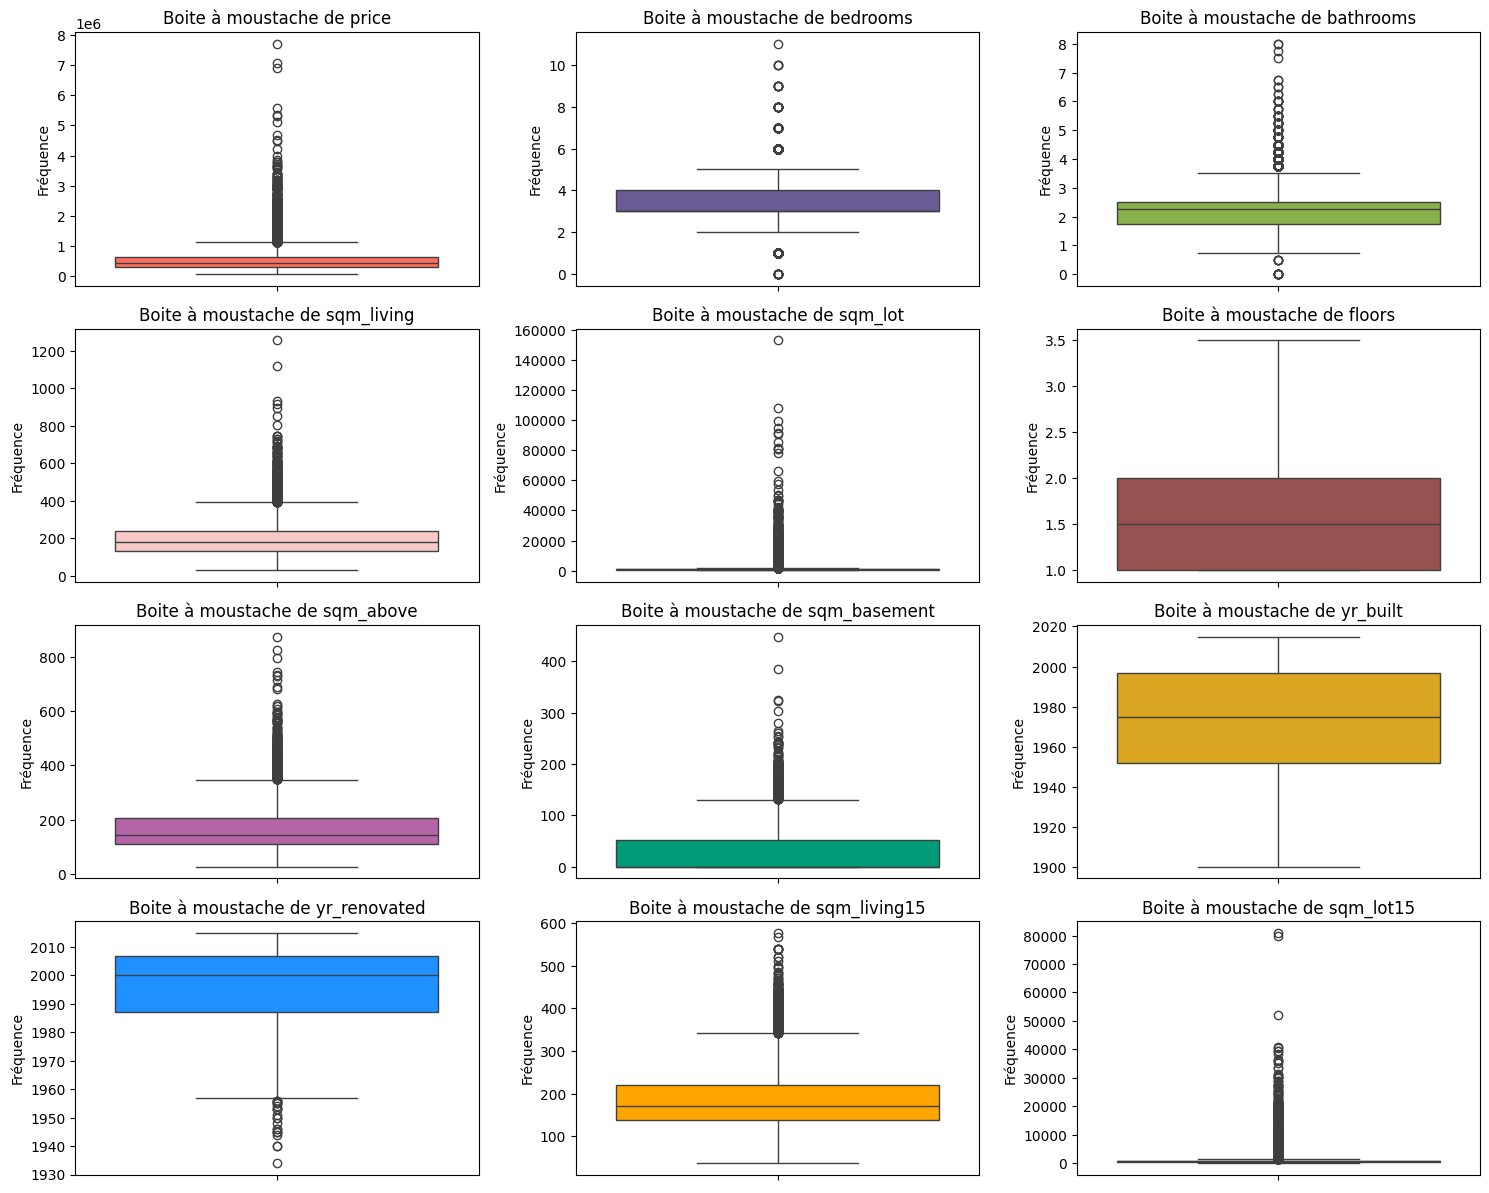

In [46]:
# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors_quantitative)):
    
    # Identifier les sous-graphiques
    row = i // 3  # Calcul de la ligne
    col = i % 3   # Calcul de la colonne

    # Boîte à moustaches
    sns.boxplot(df[variable], boxprops=dict(facecolor=color), ax=axes[row, col])
    axes[row, col].set_title(f'Boite à moustache de {variable}')
    axes[row, col].set_ylabel('Fréquence')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

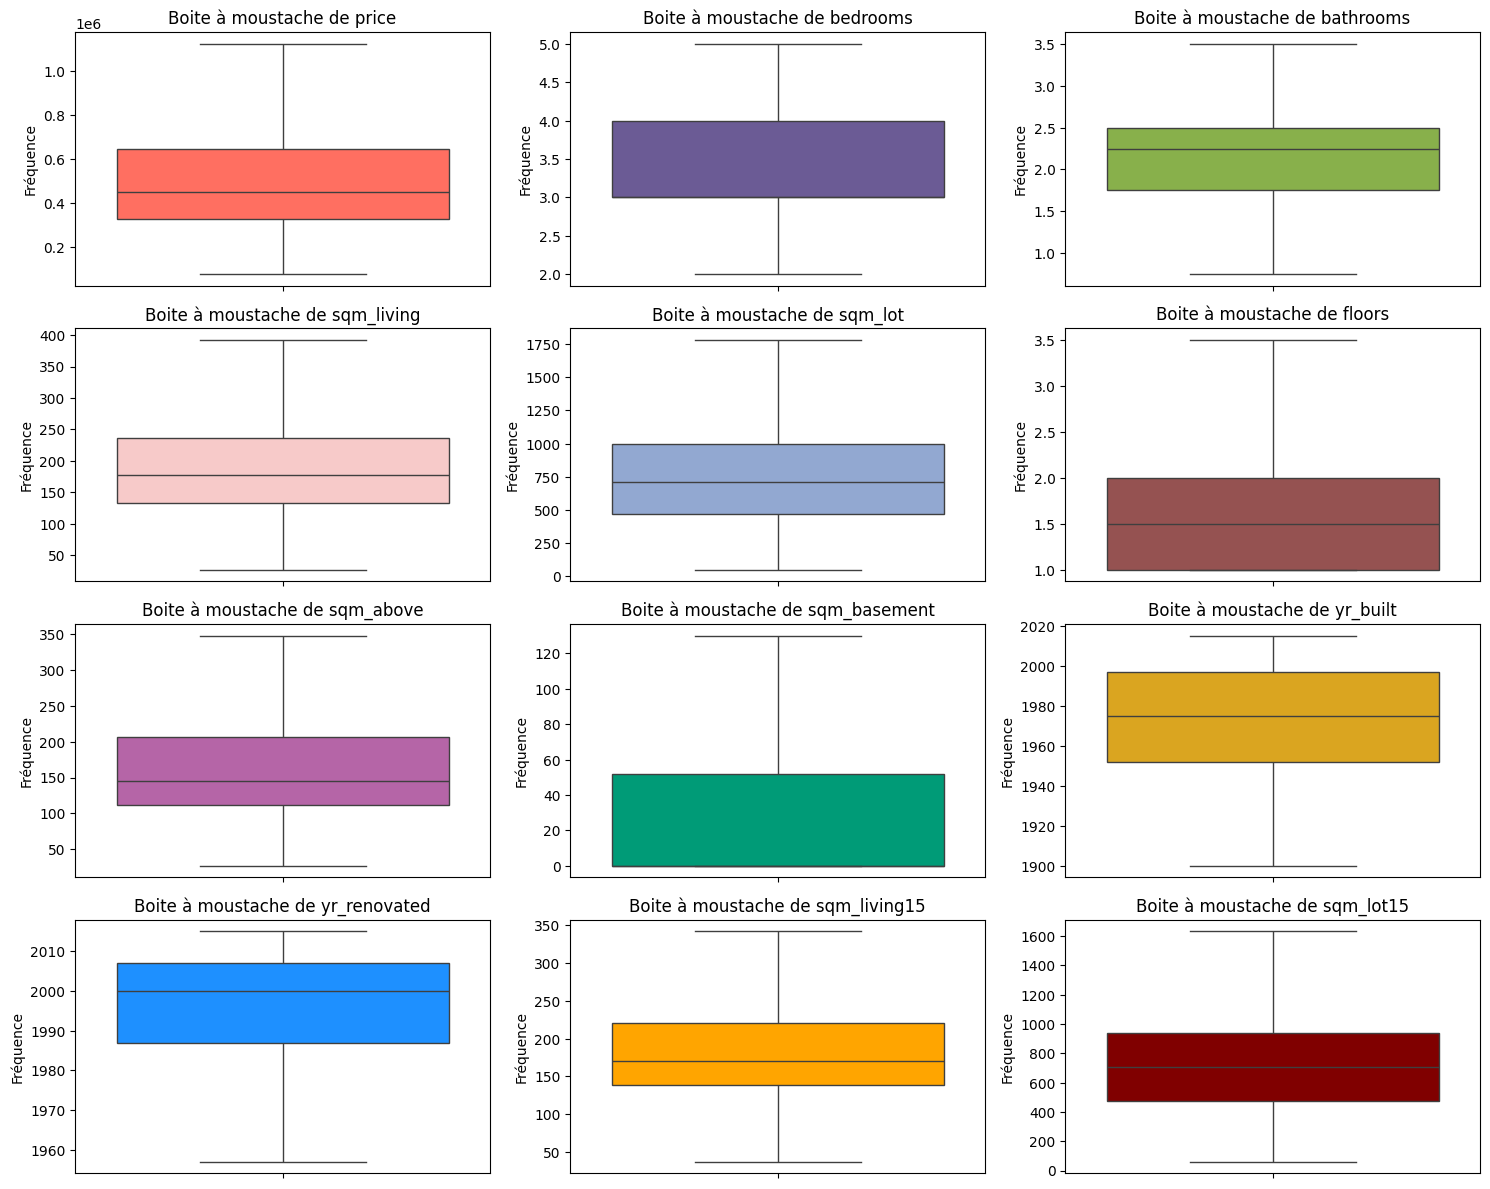

In [47]:
# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors_quantitative)):
    
    # Identifier les sous-graphiques
    row = i // 3  # Calcul de la ligne
    col = i % 3   # Calcul de la colonne

    # Boîte à moustaches
    sns.boxplot(df[variable], boxprops=dict(facecolor=color), ax=axes[row, col], showfliers=False)
    axes[row, col].set_title(f'Boite à moustache de {variable}')
    axes[row, col].set_ylabel('Fréquence')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

We use a modified box plot where the whiskers extend from the the box to the adjacent values. The adjacent values are defined as the lowest and highest observations that are still inside the region defined by the following limits:  
$$ Q1 - 1.5 \times \text{IQR} $$  
  
$$ Q3 + 1.5 \times \text{IQR} $$  
  
$$ \text{IQR (Interquartile range)} = Q3 - Q1 $$

$ \text{Q1 (First Quartile)} $: value that separates the lowest 25% of the data from the remaining 75%. Mathematically, it's the median of the lower half of the dataset (calculating from the median of the dataset).  

$ \text{Q3 (Third Quartile)} $: value that separates the lowest 75% of the data from the highest 25%. Mathematically, it's the median of the upper half of the dataset.  
  
  
Function for calculating the upper and lower whisker limits are defined as upper_whisker(data):

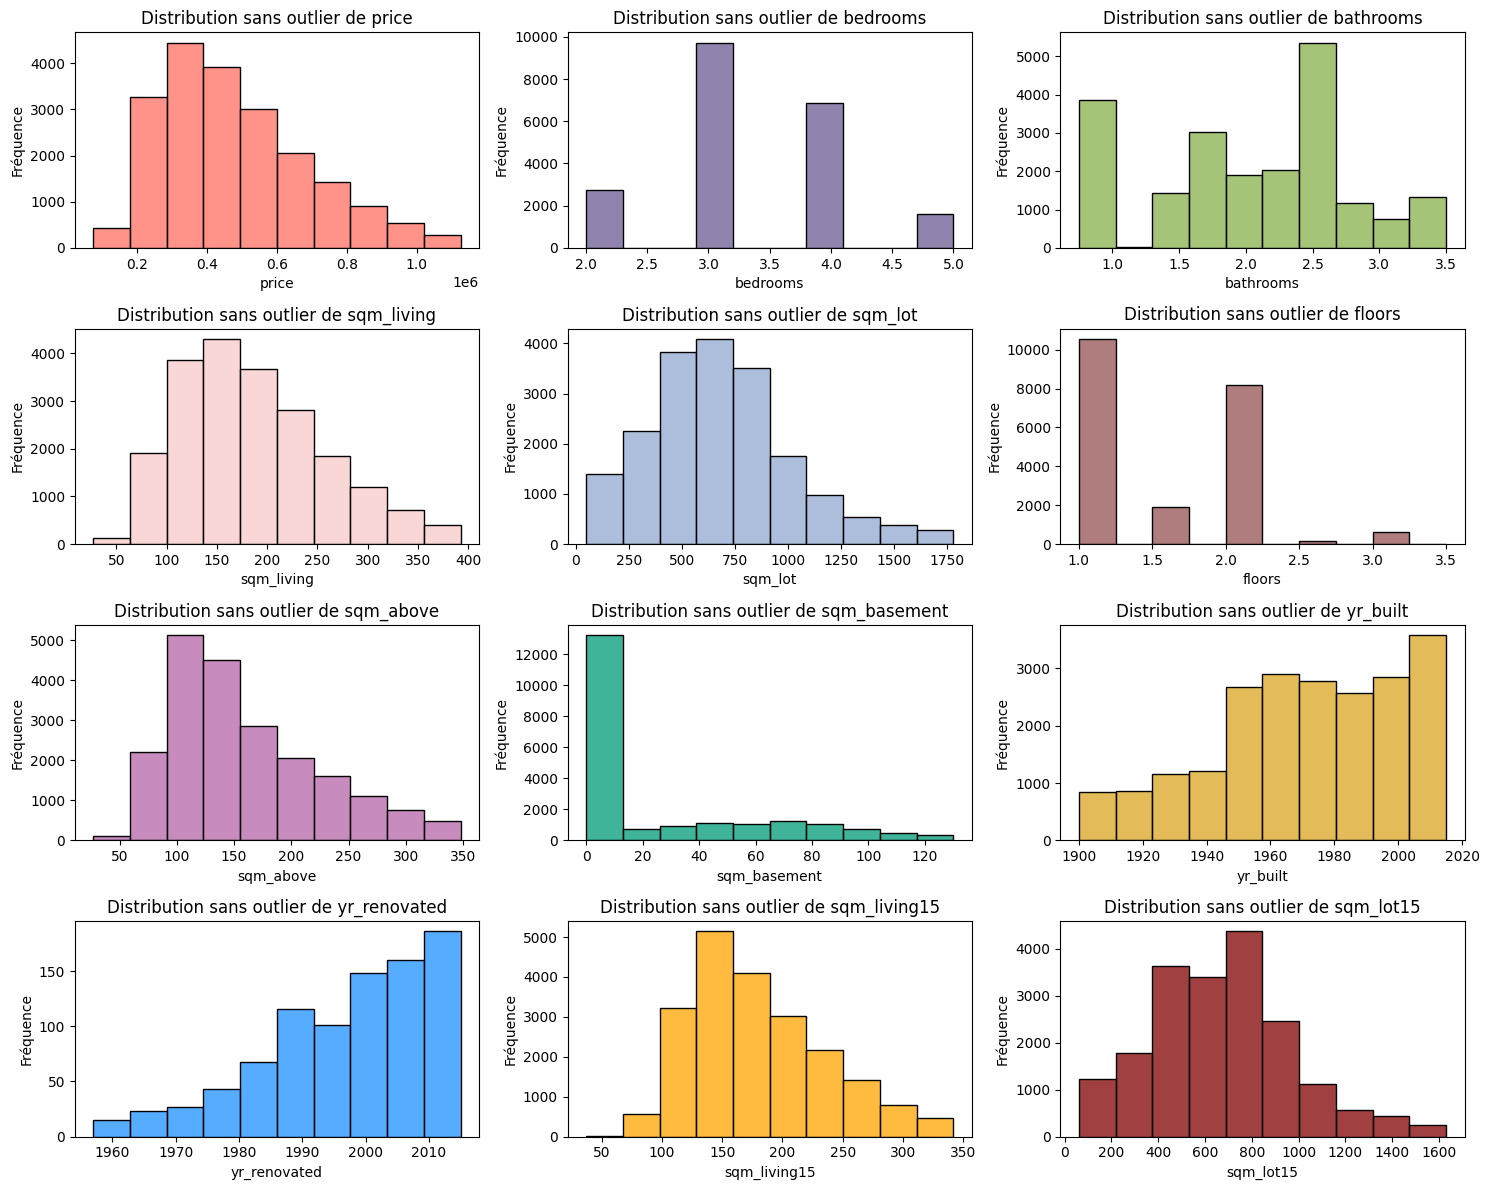

In [48]:
# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors_quantitative)):
    
    # Identifier les sous-graphiques
    row = i // 3  # Calcul de la ligne
    col = i % 3   # Calcul de la colonne

    # Histogramme des données filtrées (sans valeurs aberrantes)
    lower_bound = boxplot_whiskers(df[variable])[0]
    upper_bound = boxplot_whiskers(df[variable])[1]
    filtered_data = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]
    
    sns.histplot(filtered_data[variable], bins=10, color=color, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution sans outlier de {variable}')
    axes[row, col].set_ylabel('Fréquence')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [49]:
print(f"After outliers removal, dataframe has {filtered_data.shape[0]} data records")

After outliers removal, dataframe has 19256 data records


In [50]:
df = filtered_data.copy()

##### Categorical variables

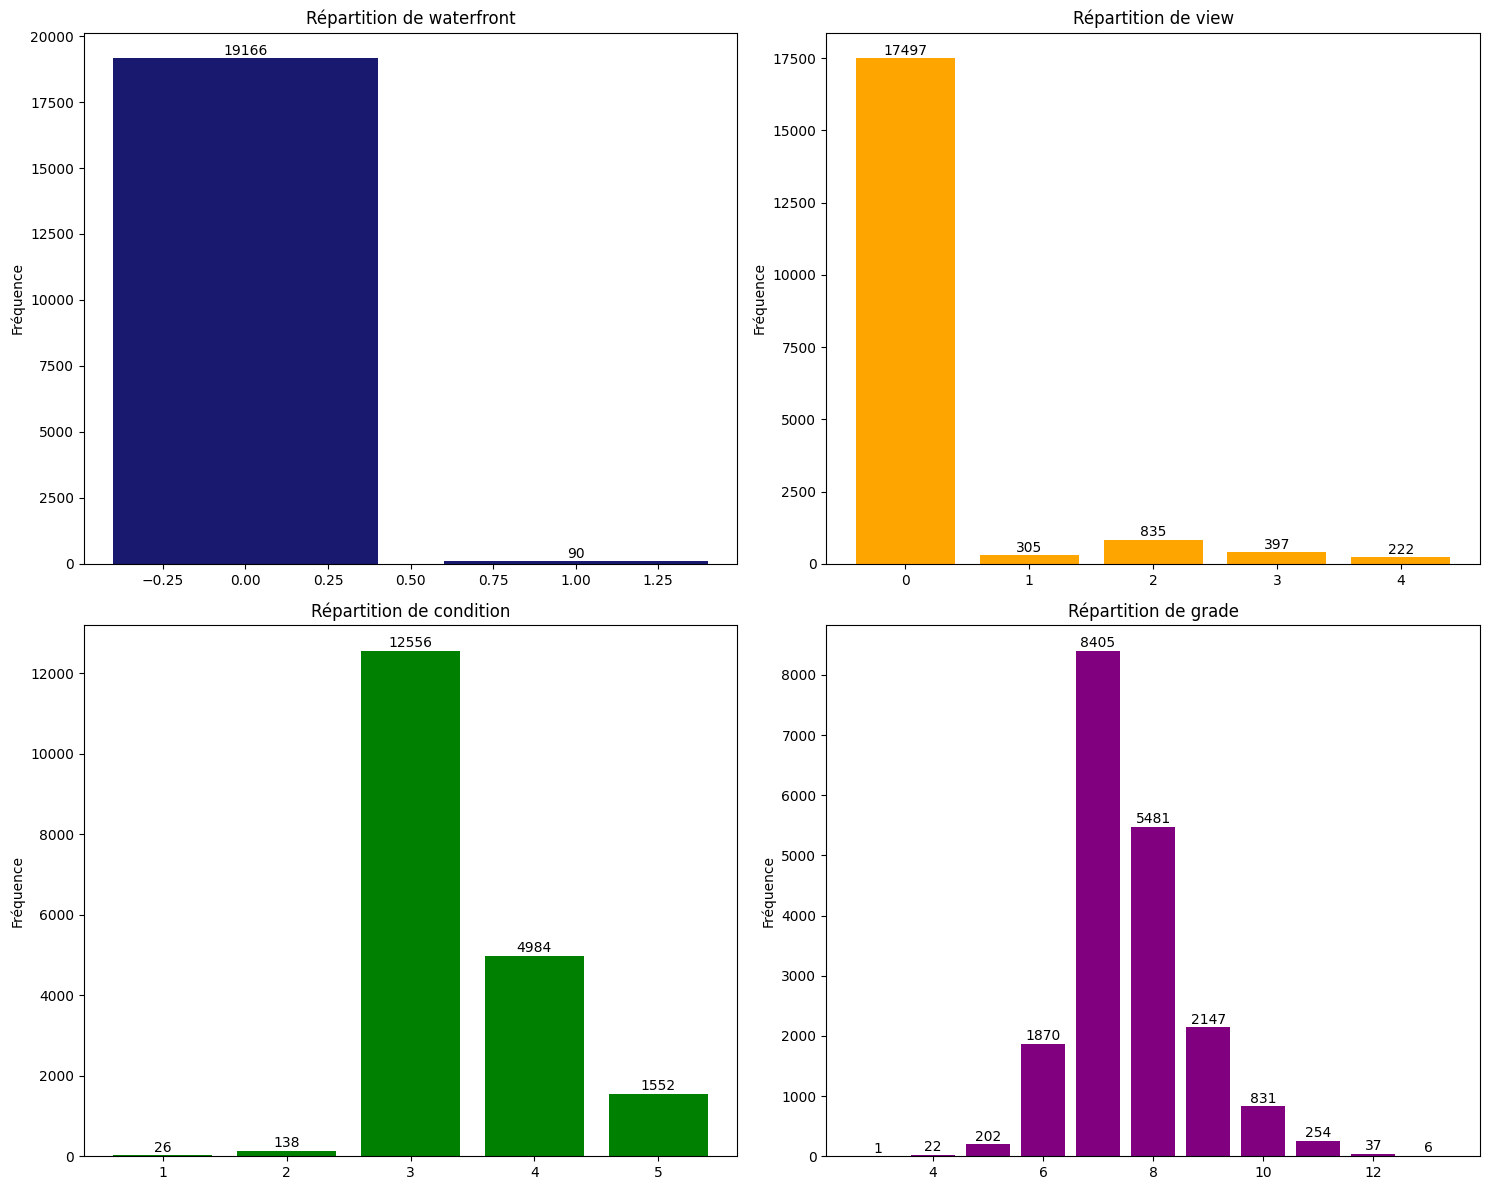

In [51]:
# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors_qualitative)):
    # Compter les occurrences de chaque catégorie
    counts = df[variable].value_counts()
    
    # Identifier les sous-graphiques
    row = i // 2  # Calcul de la ligne
    col = i % 2   # Calcul de la colonne

    # Diagramme en barres
    ax = axes[row, col]
    ax.bar(counts.index, counts.values, color=color)
    ax.set_title(f'Répartition de {variable}')
    ax.set_ylabel('Fréquence')

    # Ajout des valeurs au-dessus des barres
    for j, (view, count) in enumerate(counts.items()):
        ax.text(view, count + 10, str(count), ha='center', va='bottom')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

#### Correlation & Association tests

Correlation Matrix

<Axes: >

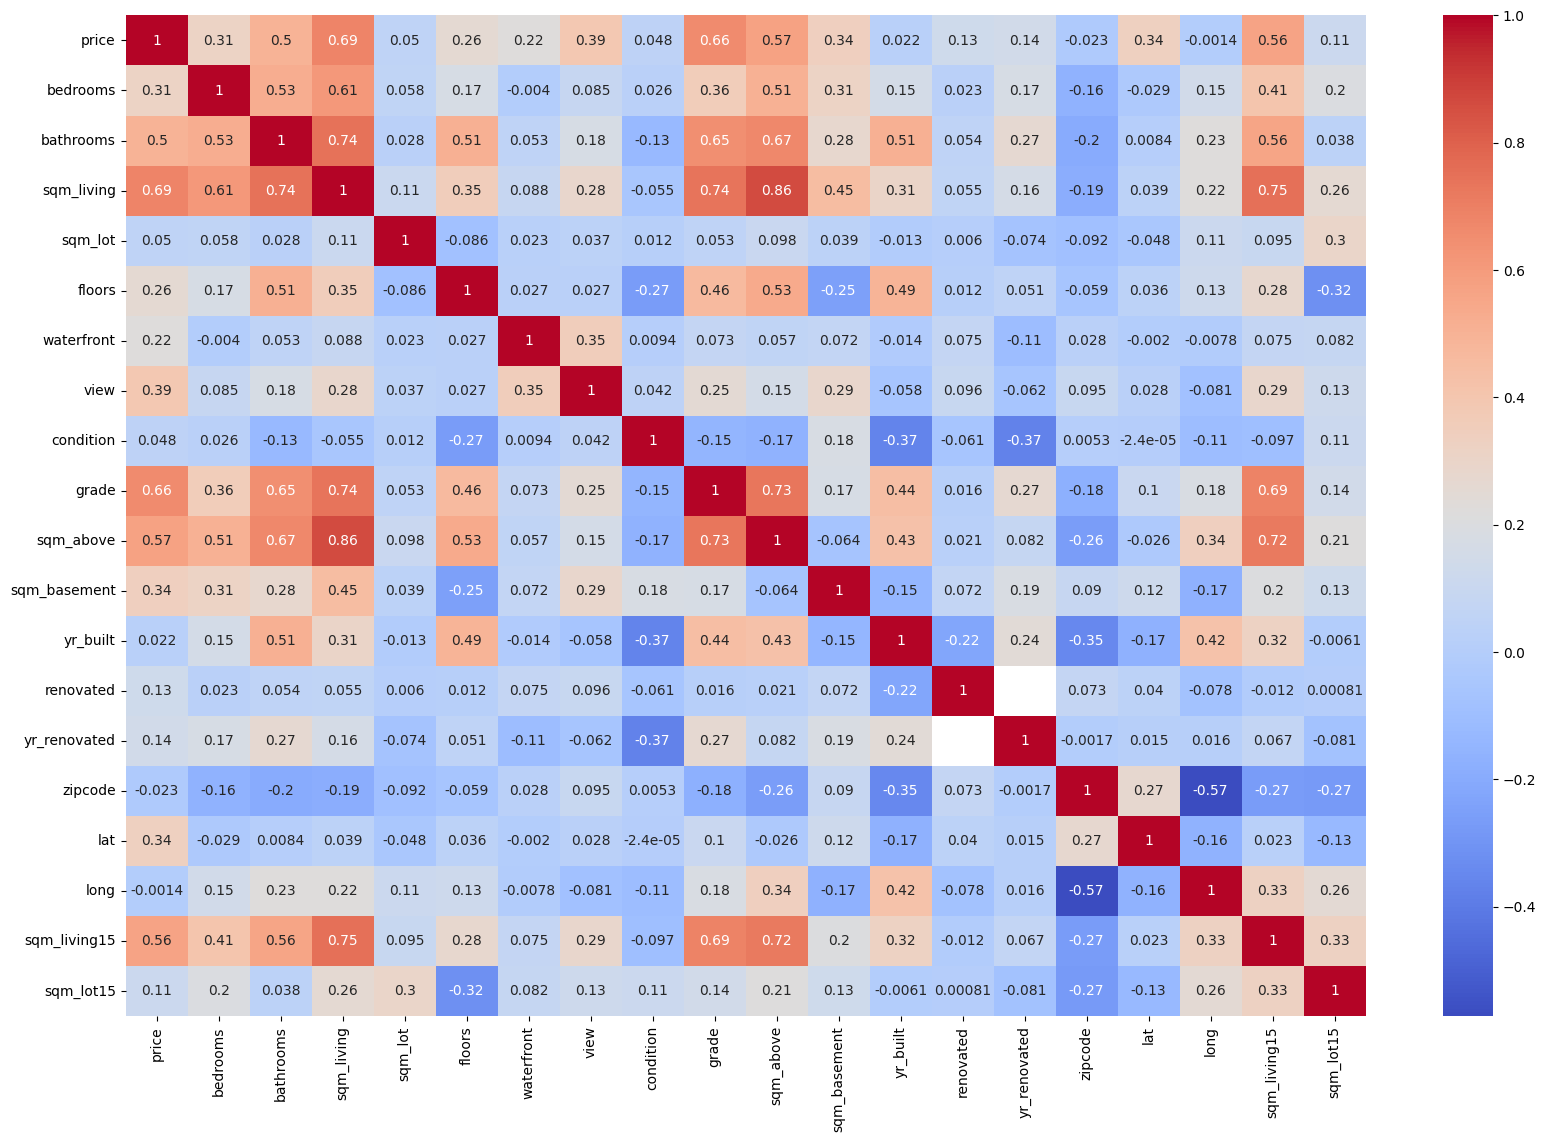

In [52]:
df_kc_filtred_wo_date = df.copy()
df_kc_filtred_wo_date.drop(columns=["date", "city"], inplace=True)
corr_matrix = df_kc_filtred_wo_date.corr()

plt.figure(figsize=(20,13))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

List of variables that are correlating with price with koefficient greater than 0.6:

In [53]:
corr_treshold = 0.6

corr_vars = corr_matrix[abs(corr_matrix["price"]) > corr_treshold]

corr_vars_list = corr_vars.index.tolist()
corr_vars_list.remove("price")

corr_vars_list

['sqm_living', 'grade']

The variables that have a strong correlation with the price column are **m2_living** and **grade**.
These variables seem to be the most impactfull on the determination of the Real Estate price.

List of variable pairs that have a correlation between them greater than 0.8:

In [54]:
corr_treshold = 0.8

for variable in corr_matrix.columns:
    corr_vars = corr_matrix[abs(corr_matrix[variable]) > corr_treshold]

    corr_vars_list = corr_vars.index.tolist()
    corr_vars_list.remove(variable)
    
    if corr_vars_list:
        print(f"Variable correlating with {variable} is : {corr_vars_list}")

Variable correlating with sqm_living is : ['sqm_above']
Variable correlating with sqm_above is : ['sqm_living']


There appears to be a significant correlation between the **m2_above** and **m2_living** variables, which makes perfect sense given their nature.  
  
Since m2_living already has a strong correlation with price, it would be wise to **exclude the m2_above variable from the dataframe to avoid multicolinearity**.  
This decision is reinforced by the superior relevance of m2_living, which makes the addition of m2_above redundant and likely to disrupt our model by introducing double information.  
  
For the same reasons, we decide to **delete the m2_basement** column

In [55]:
df.drop(columns=["sqm_above", "sqm_basement"], inplace=True)

#### Data Visualization (Multivariate Analysis)

##### sqm_living, sqm_lot

Creating a `df_temp` without sqm_living outliers (iterative approach on outliers removal):

In [56]:
df_temp = df.copy()
df_temp = df_temp[(df_temp['sqm_living'] <= boxplot_whiskers_iterative_outliers_removal(df_temp, 'sqm_living')[1])]

Box plot of bedrooms by square meters living group:

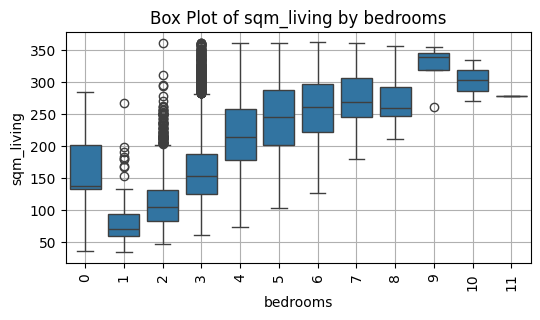

In [57]:
boxplot_categories(df_temp, 'bedrooms', 'sqm_living', (6, 3), 90, False, 'Box Plot of sqm_living by bedrooms')

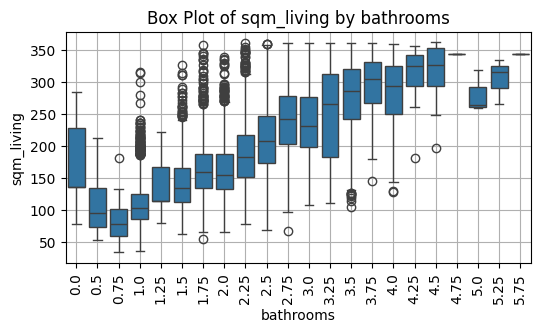

In [58]:
boxplot_categories(df_temp, 'bathrooms', 'sqm_living', (6, 3), 90, False, 'Box Plot of sqm_living by bathrooms')

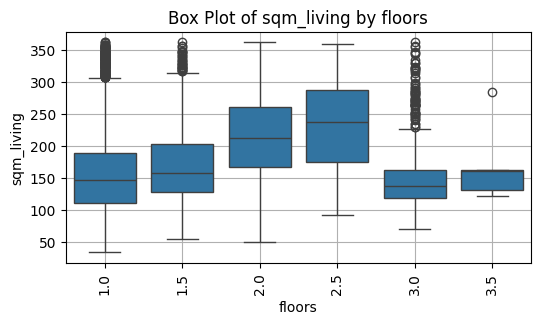

In [59]:
boxplot_categories(df_temp, 'floors', 'sqm_living', (6, 3), 90, False, 'Box Plot of sqm_living by floors')

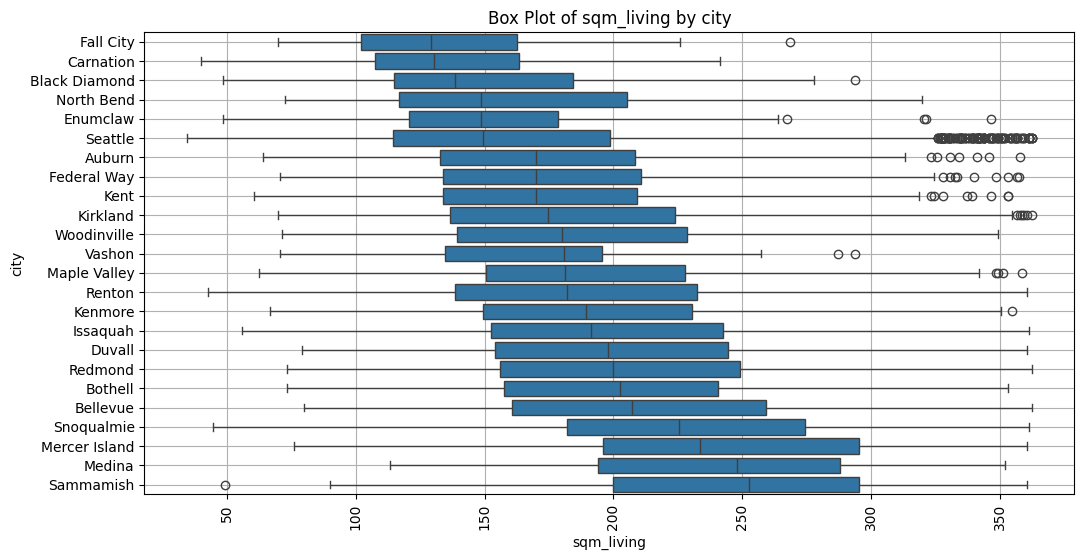

In [60]:
boxplot_categories(df_temp, 'sqm_living', 'city', (12, 6), 90, True, 'Box Plot of sqm_living by city')

Updating a `df_temp` by removing sqm_lot outliers (iterative approach on outliers removal):

In [61]:
whiskers = boxplot_whiskers_iterative_outliers_removal(df, 'sqm_lot')
df_temp = df_temp[(df_temp['sqm_lot'] >= whiskers[0]) & (df_temp['sqm_lot'] <= whiskers[1])]

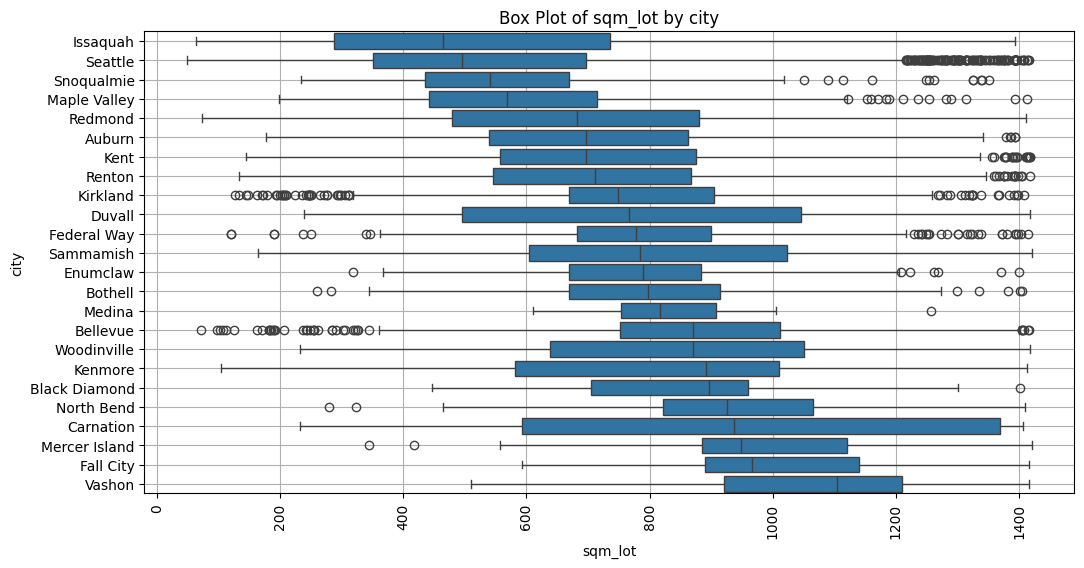

In [62]:
boxplot_categories(df_temp, 'sqm_lot', 'city', (12, 6), 90, True, 'Box Plot of sqm_lot by city')

The list of cities ordered by median by `sqm_living` completely change compared to order by `sqm_lot`.

##### price

Updating a `df_temp` by removing price outliers (iterative approach on outliers removal):

In [63]:
whiskers = boxplot_whiskers_iterative_outliers_removal(df_temp, 'price')
df_temp = df_temp[(df_temp['price'] >= whiskers[0]) & (df_temp['price'] <= whiskers[1])]

Updating a `df_temp` with a new `sqm_living_group` column that groups `sqm_living` data by Sq m living data distribution, 12 histogram bins:

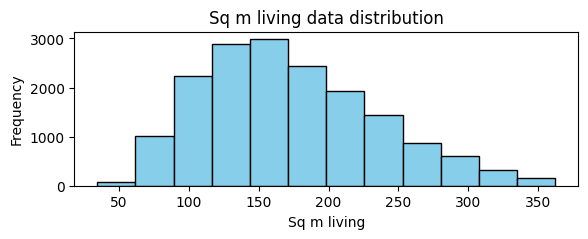

Bin 1:  starts at 34.37 ends at 61.7
Bin 2:  starts at 61.7 ends at 89.03
Bin 3:  starts at 89.03 ends at 116.36
Bin 4:  starts at 116.36 ends at 143.69
Bin 5:  starts at 143.69 ends at 171.02
Bin 6:  starts at 171.02 ends at 198.35
Bin 7:  starts at 198.35 ends at 225.68
Bin 8:  starts at 225.68 ends at 253.01
Bin 9:  starts at 253.01 ends at 280.34
Bin 10:  starts at 280.34 ends at 307.67
Bin 11:  starts at 307.67 ends at 335.0
Bin 12:  starts at 335.0 ends at 362.33


In [64]:
df_temp = create_column_histogram_bin_number(df_temp, 'sqm_living', 12, 'sqm_living_group')
no_of_bins = 12
histogram(df_temp['sqm_living'], label='Sq m living', bins=no_of_bins, figsize=(6.5, 2))
hist_bin_values = histogram_bins_values(df_temp['sqm_living'], no_of_bins, print_flag=True)

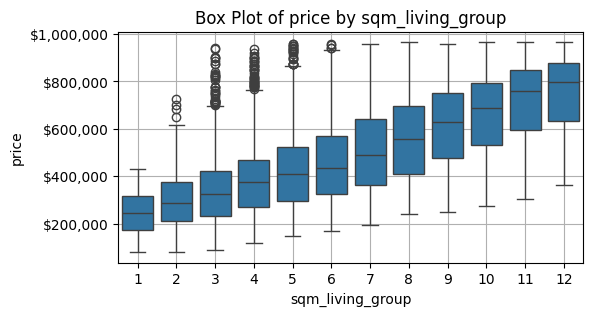

In [65]:
boxplot_categories(df_temp, 'sqm_living_group', 'price', (6, 3))

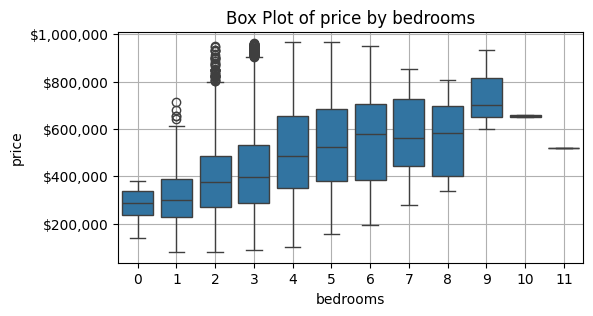

In [66]:
boxplot_categories(df_temp, 'bedrooms', 'price', (6, 3))

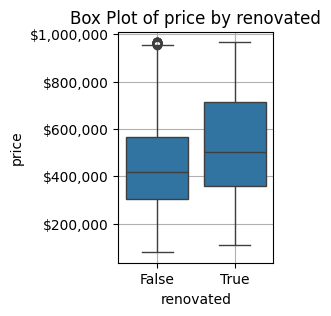

In [67]:
boxplot_categories(df_temp, 'renovated', 'price', (2, 3))

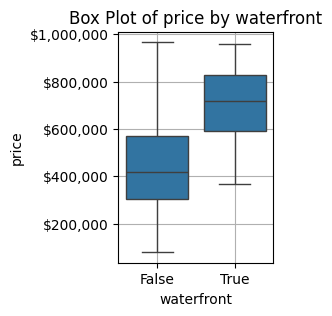

In [68]:
boxplot_categories(df_temp, 'waterfront', 'price', (2, 3))

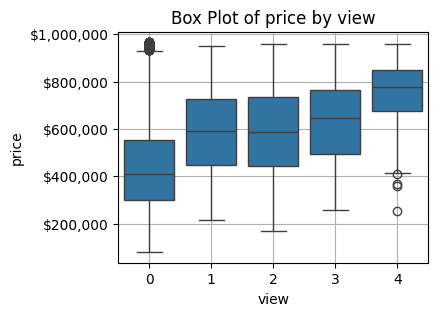

In [69]:
boxplot_categories(df_temp, 'view', 'price', (4, 3))

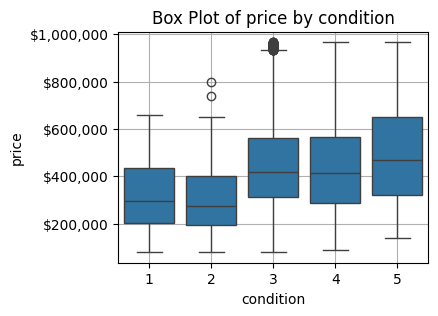

In [70]:
boxplot_categories(df_temp, 'condition', 'price', (4, 3))

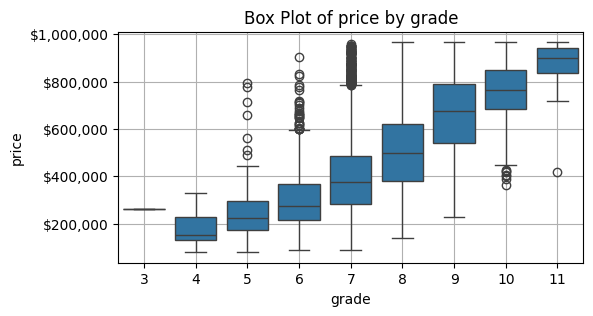

In [71]:
boxplot_categories(df_temp, 'grade', 'price', (6, 3))

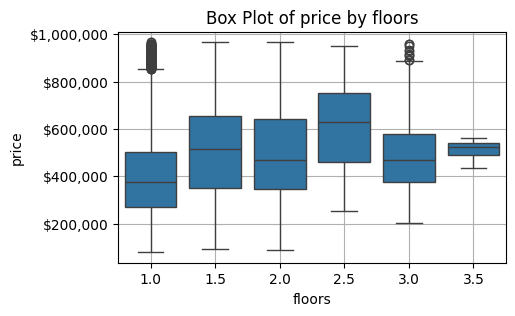

In [72]:
boxplot_categories(df_temp, 'floors', 'price', (5, 3))

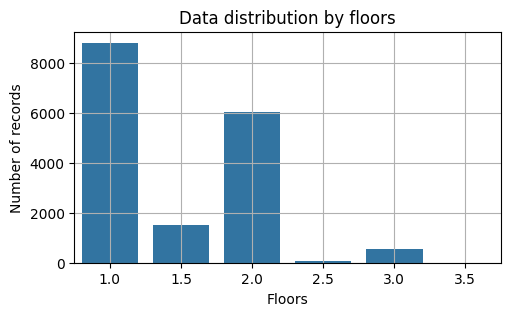

In [73]:
vc = df_temp.floors.value_counts()
barplot(vc, 'Data distribution by floors', 'Floors', 'Number of records', figsize=(5.5, 3))

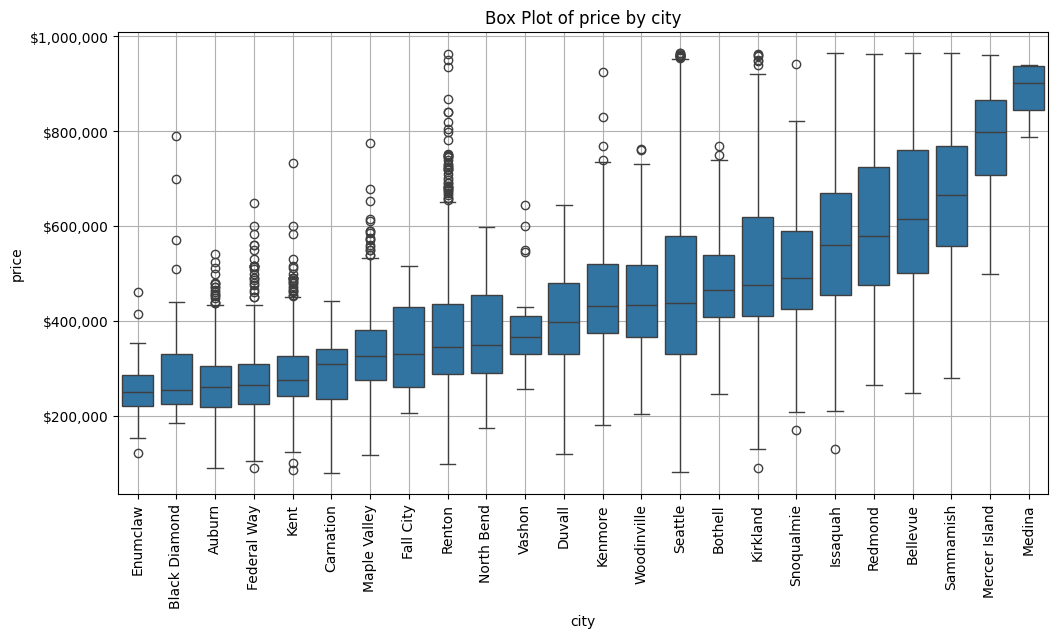

In [74]:
boxplot_categories(df_temp, 'city', 'price', (12, 6), 90, order_by_median_flag=True)

In [75]:
color_scale = ['#00FF00', '#FFFF00', '#FF0000']  # Green, Yellow, Red
fig = px.scatter_mapbox(df_temp, lat='lat', lon='long', color='price',
                        color_continuous_scale=color_scale,
                        hover_data=['price', 'city'], 
                        zoom=10)
fig.update_layout(mapbox_style="open-street-map",
                  coloraxis_colorbar=dict(title="Price"),
                  title="Districts by Price (Cheapest to Most Expensive)")
fig.show()

#### Exporting the cleaned dataframe to CSV

In [78]:
df.to_csv("dataset_machine_learning.csv", index=False)

date    price  bedrooms  bathrooms  sqm_living  sqm_lot  floors  \
9596  2014-05-02   790000         3       2.50      241.55   441.29    1.00   
20602 2014-05-02   555000         4       2.50      307.51   603.87    2.00   
11577 2014-05-02   440000         4       2.25      200.67   754.28    1.00   
20559 2014-05-02   295000         2       2.50      151.43   127.09    2.00   
18690 2014-05-02   470000         5       2.50      205.32   896.98    1.00   
...          ...      ...       ...        ...         ...      ...     ...   
7898  2015-05-14   183000         3       1.00      108.70   680.05    1.00   
928   2015-05-14   359000         2       2.75      127.28   105.91    2.00   
5637  2015-05-15   450000         5       2.00      173.73   682.28    1.50   
13053 2015-05-24   445500         2       1.75      129.14   619.66    1.00   
16594 2015-05-27  1310000         4       2.25      348.39   464.52    2.00   

       waterfront  view  condition  grade  yr_built  renovated  yr_renovated  \
9596        False     0          4      9      1951      False           NaN   
20602       False     0          3      8      2012      False           NaN   
11577       False     0          3      8      1966      False           NaN   
20559       False     0          3      7      2009      False           NaN   
18690       False     0          3      8      1976      False           NaN   
...           ...   ...        ...    ...       ...        ...           ...   
7898        False     0          3      7      1962      False           NaN   
928         False     0          3      8      2009      False           NaN   
5637        False     0          3      7      1960      False           NaN   
13053       False     0          3      6      1941      False           NaN   
16594       False     0          5      8      1924      False           NaN   

       zipcode        city   lat    long  sqm_living15  sqm_lot15  
9596     98117     Seattle 47.68 -122.40        221.11     441.29  
20602    98065  Snoqualmie 47.52 -121.87        221.11     464.52  
11577    98006    Bellevue 47.54 -122.18        171.87     836.13  
20559    98106     Seattle 47.55 -122.36        147.72     214.23  
18690    98011     Bothell 47.77 -122.22        193.24     802.03  
...        ...         ...   ...     ...           ...        ...  
7898     98188     Seattle 47.47 -122.28        189.52     680.05  
928      98133     Seattle 47.71 -122.34        127.28     101.26  
5637     98007    Bellevue 47.60 -122.14        173.73     710.71  
13053    98115     Seattle 47.69 -122.31         85.47     592.72  
16594    98115     Seattle 47.67 -122.30        201.60     426.42  

[19256 rows x 20 columns]

**Quantitative variables**:  
- sqm_living,  
- sqm_lot,  
- sqm_living15,  
- sqm_lot15,  
- floors,  
- yr_renovated,  
- bedrooms,  
- bathrooms,  
- yr_built  
  
**Categorical variables**:  
- view,  
- condition,  
- grade,  
- zipcode,  
- city,  
- renovated,  
- waterfront